<center><img src="Fig/UGA.png" width="30%" height="30%"></center>
<center><h3>Master of Science in Industrial and Applied Mathematics (MSIAM)  - 1st year</h3></center>
<hr>
<center><h1>Numerical Optimization</h1></center>
<center><h2>Lab 7: Stochastic Gradient</h2></center>

---

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import logistic_regression_student as pb
import timeit

import matplotlib.pyplot as plt
%matplotlib inline

# Logistic Regression Problem
 
 
 
### Machine Learning as an Optimization problem
 
We have some *data*  $\mathcal{D}$ consisting of $m$ *examples* $\{d_i\}$; each example consisting of a *feature* vector $a_i\in\mathbb{R}^d$ and an *observation* $b_i\in \mathcal{O}$: $\mathcal{D} = \{[a_i,b_i]\}_{i=1..m}$. In this lab, we will consider the <a href="http://archive.ics.uci.edu/ml/datasets/Student+Performance">student performance</a> dataset.
 
 
The goal of *supervised learning* is to construct a predictor for the observations when given feature vectors.
 
 
 A popular approach is based on *linear models* which are based on finding a *parameter* $x$ such that the real number $\langle a_i , x \rangle$ is used to predict the value of the observation through a *predictor function* $g:\mathbb{R}\to \mathcal{O}$: $g(\langle a_i , x \rangle)$ is the predicted value from $a_i$.
 
 
 In order to find such a parameter, we use the available data and a *loss* $\ell$ that penalizes the error made between the predicted $g(\langle a_i , x \rangle)$ and observed $b_i$ values. For each example $i$, the corresponding error function for a parameter $x$ is $f_i(x) =   \ell( g(\langle a_i , x \rangle) ; b_i )$. Using the whole data, the parameter that minimizes the total error is the solution of the minimization problem
 $$ \min_{x\in\mathbb{R}^d}  \frac{1}{m} \sum_{i=1}^m f_i(x) = \frac{1}{m} \sum_{i=1}^m  \ell( g(\langle a_i , x \rangle) ; b_i ). $$
 
 
 
### Regularized Problem 
 
In this lab, we will consider an $\ell_1$ regularization to promote sparsity of the iterates. A sparse final solution would select the most important features. The new function (below) is non-smooth but it has a smooth part, $f$; and a non-smooth part, $g$, that we will treat with proximal operations.
 
 \begin{align*}
     \min_{x\in\mathbb{R}^d } F(x) := \underbrace{  \sum_{i=1}^m \overbrace{\frac{1}{m}  \log( 1+\exp(-b_i \langle a_i,x \rangle) ) + \frac{\lambda_2}{2m} \|x\|_2^2 }^{f_i(x)} }_{f(x)} + \underbrace{\lambda_1 \|x\|_1 }_{g(x)}.
 \end{align*}
 
 


# Recall of the proximal gradient algorithm

Below is an implementation of the proximal gradient algorithm.

In [3]:
def proximal_gradient_algorithm(F , f_grad , g_prox , x0 , step , PREC , ITE_MAX , PRINT ):
    x = np.copy(x0)
    x_tab = np.copy(x)
    if PRINT:
        print("------------------------------------\n Proximal gradient algorithm\n------------------------------------\nSTART    -- stepsize = {:0}".format(step))
    t_s =  timeit.default_timer()

    for k in range(ITE_MAX):
        g = f_grad(x)
        x = g_prox(x - step*g , step)

        x_tab = np.vstack((x_tab,x))

    t_e =  timeit.default_timer()
    if PRINT:
        print("FINISHED -- {:d} iterations / {:.6f}s -- final value: {:f}".format(k,t_e-t_s,F(x)))
    return x, x_tab

In [4]:
#### Parameter we give our algorithm
PREC    = 1e-5                     # Sought precision
ITE_MAX = 1000                     # Max number of iterations
x0      = np.zeros(pb.n)           # Initial point
step    = 1.0/pb.L

##### gradient algorithm
x,x_tab = proximal_gradient_algorithm(pb.F , pb.f_grad, pb.g_prox, x0, step, PREC, ITE_MAX , True)

------------------------------------
 Proximal gradient algorithm
------------------------------------
START    -- stepsize = 0.030334772813507393
FINISHED -- 999 iterations / 3.027533s -- final value: 0.438712


### Decrease of the algorithm.

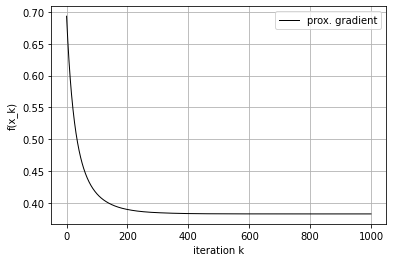

In [5]:
xs = range(x_tab.shape[0])
ys = [ pb.f(x_tab[ind]) for ind in xs ]

fig, ax = plt.subplots()
ax.plot(xs, ys, linewidth=1.0, linestyle='-', label='prox. gradient', color='black')
ax.set(xlabel='iteration k', ylabel='f(x_k)')
ax.legend(); ax.grid()

### Support of the vector $x_k$ 

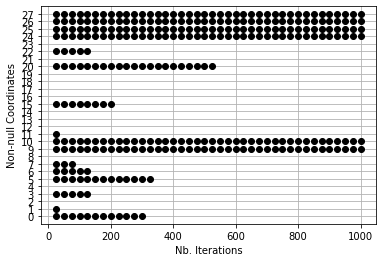

In [6]:
fig, ax = plt.subplots()

for i in np.arange(0,x_tab.shape[0],int(x_tab.shape[0]/40)):
    for j in range(pb.n):
        if np.abs(x_tab[i, j])>1e-14:
            ax.plot(i, j,'ko')

ax.set(ylabel='Non-null Coordinates', xlabel='Nb. Iterations', ylim=(-1,pb.d+1), yticks=np.arange(0,pb.d+1))
ax.grid()

---

# Stochastic gradient


In the following, instead of considering $f$ as a whole, we will use its structure 
$$ f(x) := \frac{1}{m}\sum_{i=1}^m f_i(x)$$

## f(x) is already implemented.

> **Task 1**: Implement the oracle corresponfing to evaluating $f_i$ and $\nabla f_i$, the function related to one example, in `logistic_regression_student.py`.

> **Task 2**: Compare the evaluation times of $f$, $\nabla f$, $f_i$, $\nabla f_i$. What do you notice?

You may use the `%time` macro available in jupyter notebooks (*e.g.* `%time print(np.random.rand(3))`).

With this structure a popular minimization algorithm is the *stochastic gradient algorithm* which writes as follows:
* Select uniformly $i$ in $1,..,m$
* $x_{k+1} = \mathbf{prox}_{\gamma g}\left( x_k - \gamma_k \nabla f_i(x_k) \right) $

> **Task 3**: Implement this algorithm in the notebook with a stepsize vanishing as $1/k$

## Interpretation of the behavior

### Decrease and sparsity

> **Task 4**: Investigate the decrease of the stochastic gradient algorithm, and the sparsity of the iterates.

#### Proximal gradient vs stochastic gradient

> **Task 5**: Compare the decrease of the proximal gradient and the stochastic gradient algorithms. Does the iteration count of each algorithm allows for a fair comparison?

### Task 6 -Variance reduction

The poor performance of this algorithm is notably due to the variance of the gradients. In order to overcome it, *variance reduced* algorithms have been proposed.

We will consider here the popular **SAGA** algorithm  (SAGA: A fast incremental gradient method with support for non-strongly convex composite objectives
A Defazio, F Bach, S Lacoste-Julien, NIPS 2014. ) 

> Implement SAGA from the paper ( http://papers.nips.cc/paper/5258-saga-a-fast-incremental-gradient-method-with-support-for-non-strongly-convex-composite-objectives ) and compare with the stochastic gradient algorithm.

The *saga gradient algorithm* which writes as follows:

* Initialize (once) for $i$ in $1,...,m$: $\theta_i = \nabla f_i(x_0)$
* Then for each step:
* Select uniformly $i$ in $1,..,m$ do
* $x_{k+1} = \mathbf{prox}_{\gamma g}\left( x_k - \gamma_k \left(\nabla f_i(x_k) -\theta_i + \frac{1}{m} \sum_{i=1}^{m} \theta_i \right) \right) $
* **Store** the partial gradient: $\theta_i = \nabla f_i(x_k)$




> **Task 6**: Implement this algorithm in the notebook with a stepsize vanishing as $1/k$

